# Clustering
___

In [54]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [11]:
df = pd.read_csv('datasets/1860_no_null.csv')

In [13]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df = df.set_index('country')
df.head()

,iso,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,childmor_0_5_per_1000,...,linguistic_div_index,religious_div_index,rural_population_ratio,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,gdp_per_capita_2017dollar,fertility_rate,electricity_access
country,,,,,,,,,,,,,,,,,,,,,
Finland,FIN,2006,96.0,4.16,79.6,86.1,0.921,28.0,92.5,3.64,...,0.1412,0.2531,16.963,7.72,99.448135,2.5,5266249.0,46412.200,1.84,100.0
Iceland,ISL,2006,96.0,-16.7,81.7,79.6,8.620,30.3,97.1,3.07,...,0.0820,0.1913,6.841,2.83,98.790146,2.5,304086.0,49956.848,2.09,100.0
New Zealand,NZL,2006,96.0,-0.386,80.0,87.5,2.690,32.5,90.1,6.46,...,0.1657,0.8110,13.600,3.86,100.000000,2.5,4179986.0,37828.188,2.09,100.0
Denmark,DNK,2006,95.0,4.09,78.5,87.8,2.080,25.9,95.2,4.65,...,0.1049,0.2333,13.902,3.90,99.597240,2.5,5457863.0,53322.290,1.85,100.0
Sweden,SWE,2006,92.0,6.78,81.1,91.3,1.760,26.4,98.8,3.45,...,0.1968,0.2342,15.570,7.07,99.063050,2.5,9104724.0,47292.312,1.87,100.0


In [14]:
df.columns

Index(['iso', 'year', 'CPI', 'trade_balance_perc_of_gdp', 'life_expectancy',
       'journos_imprisoned_yearly', 'inflation_annual_perc', 'gini_index',
       'democracy_index', 'childmor_0_5_per_1000', 'cellphone_per_100',
       'avrg_daily_income', 'gender_inequality_ind', 'press_freedom_index',
       'control_of_corruption', 'government_effectiveness',
       'political_stability', 'regulatory_quality', 'rule_of_low',
       'voice_and_accountability', 'ethnic_div_index', 'linguistic_div_index',
       'religious_div_index', 'rural_population_ratio',
       'unemployment_perc_tot_labor', 'pop_percent_with_sanitation',
       'undernourishment_prevalence_perc', 'population',
       'gdp_per_capita_2017dollar', 'fertility_rate', 'electricity_access'],
      dtype='object')

In [83]:
gf = df[df['year'] == 2020].reset_index(drop=True)
gf.shape

(114, 32)

Text(0, 0.5, 'journos_imprisoned_yearly')

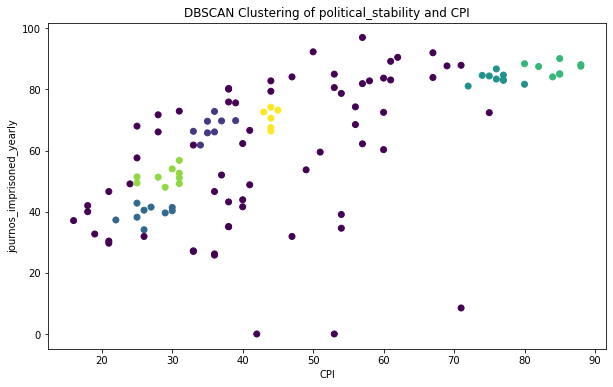

In [88]:
X = gf[['CPI','journos_imprisoned_yearly']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

gf['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(gf['CPI'], gf['journos_imprisoned_yearly'], c=gf['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of political_stability and CPI')
plt.xlabel('CPI')
plt.ylabel('journos_imprisoned_yearly')

In [89]:
X = df.drop(columns=['CPI', 'iso'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {'eps': [0.1, 0.5, 1.0], 'min_samples': [5, 10, 20]}
dbscan = DBSCAN()
grid_search = GridSearchCV(dbscan, param_grid, scoring='adjusted_rand_score', cv=5)
grid_search.fit(X_scaled)

best_dbscan = grid_search.best_estimator_
clusters = best_dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters

num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters: {num_clusters}")
print("Optimal Hyperparameters:", grid_search.best_params_); 

ValueError: could not convert string to float: '-30µ'